<a href="https://colab.research.google.com/github/NasiUduk27/PCVK_GANJIL_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

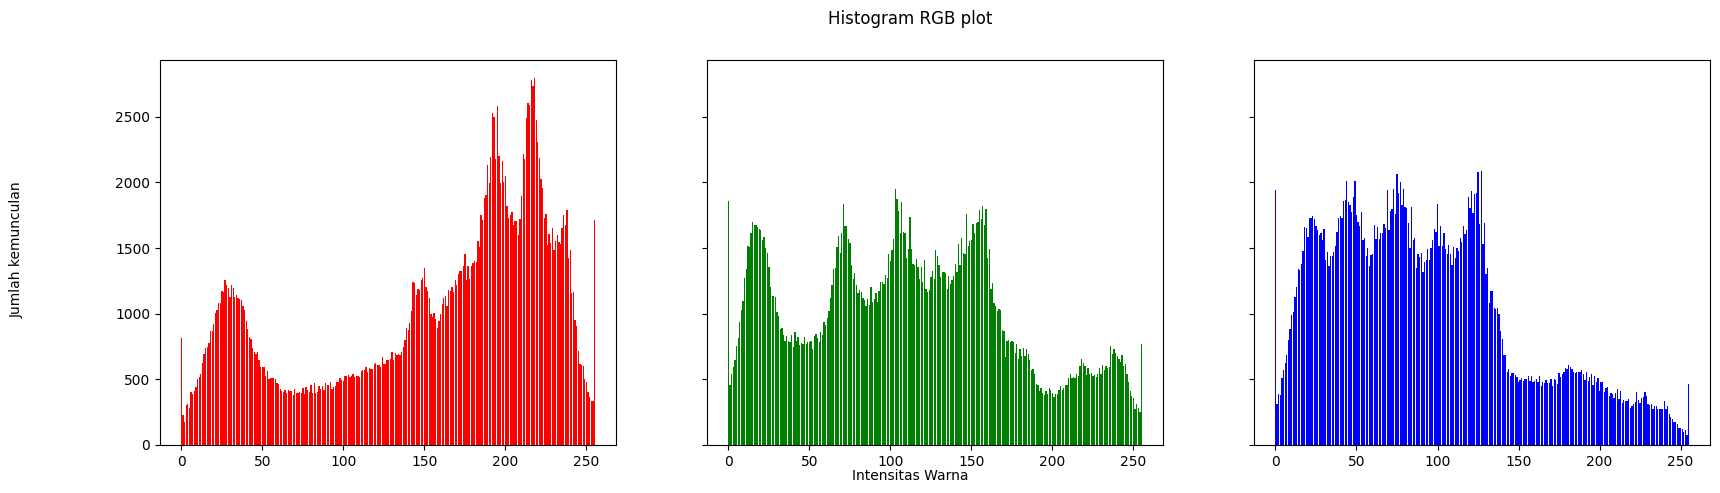

In [24]:
# Soal nomor 3

img = cv.imread('/content/drive/MyDrive/content/lena.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

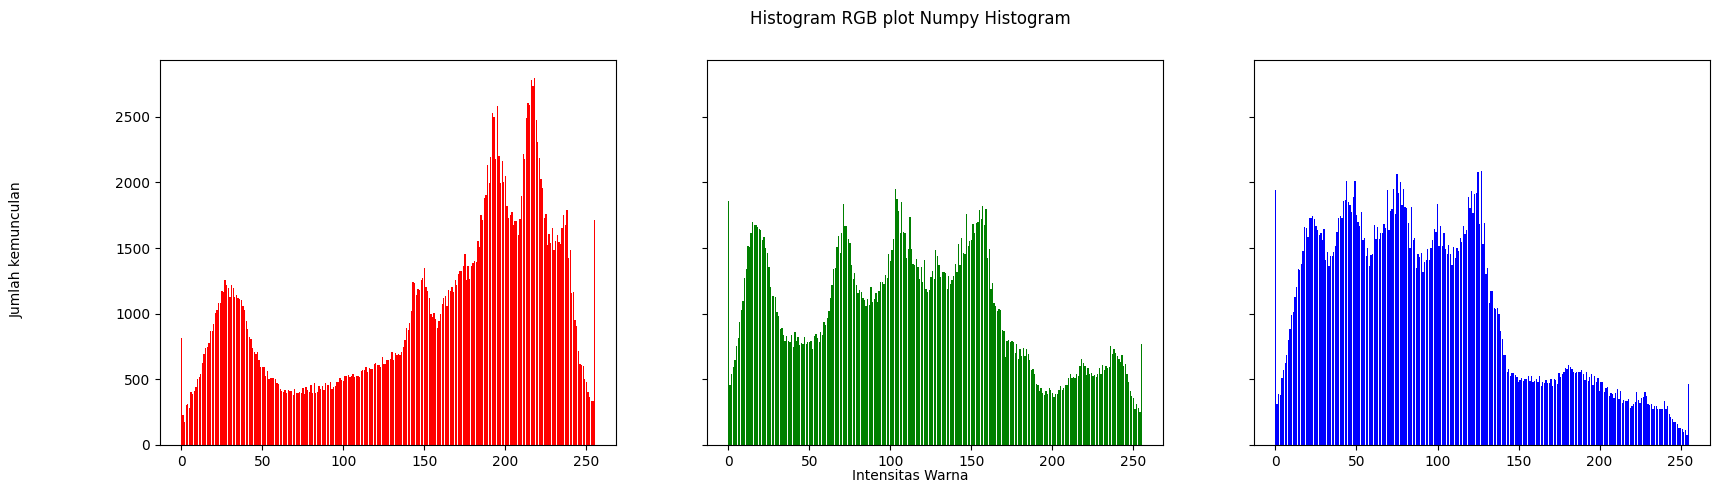

In [29]:
# Soal nomor 4

img = cv.imread('/content/drive/MyDrive/content/lena.jpg')

b, g, r = cv.split(img)

# Menggunakan np.histogram untuk menghitung histogram
hist_b, _ = np.histogram(b.ravel(), bins=256, range=(0, 256))
hist_g, _ = np.histogram(g.ravel(), bins=256, range=(0, 256))
hist_r, _ = np.histogram(r.ravel(), bins=256, range=(0, 256))

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot Numpy Histogram')
fig.text(0.05, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, hist_r, color='red')
axs[1].bar(names, hist_g, color='green')
axs[2].bar(names, hist_b, color='blue')

plt.show()

Hasilnya sama saja dengan nomor 3

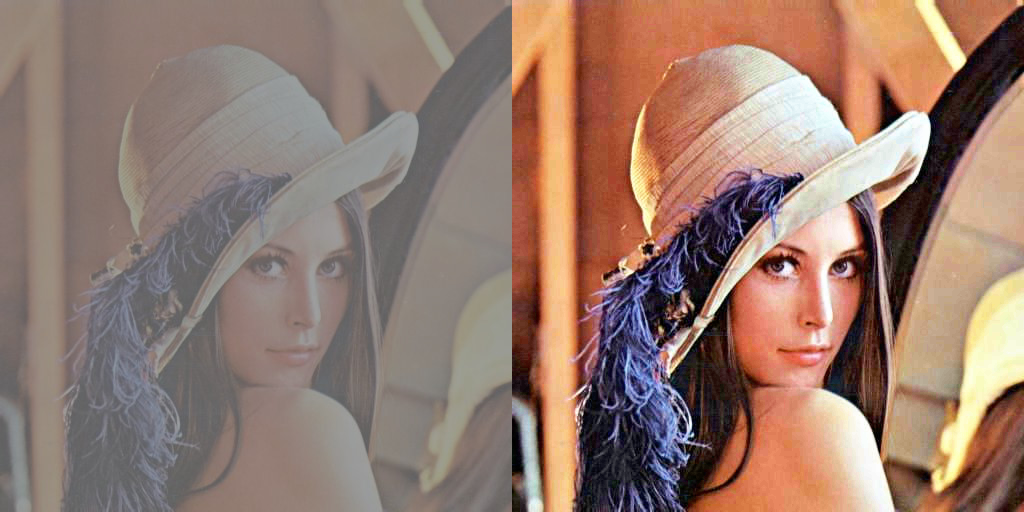

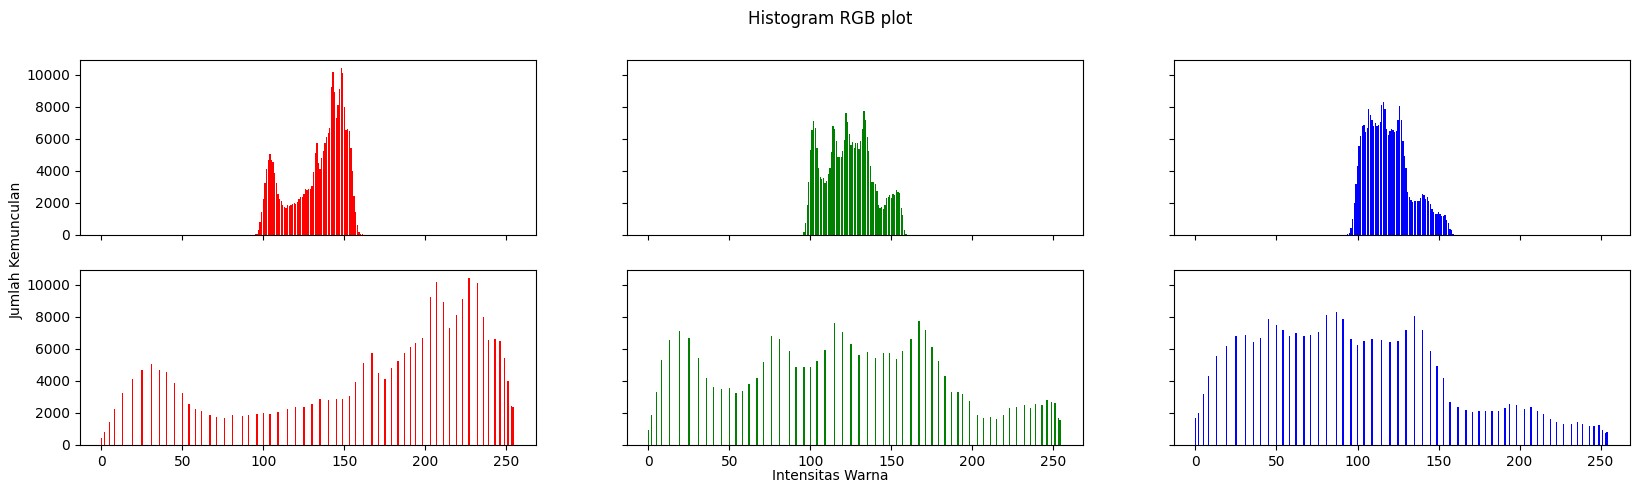

In [88]:
# Soal nomor 5

# Membaca citra masukan
img = cv.imread('/content/drive/MyDrive/content/lena_lc.jpg')

# Fungsi untuk menghitung histogram citra RGB
def histo(img1):
    height, width, depth = np.shape(img)
    ax = np.zeros((3,256))
    for y in range(0,height):
        for x in range(0,width):
            ax[0][img1[y][x][0]] += 1
            ax[1][img1[y][x][1]] += 1
            ax[2][img1[y][x][2]] += 1
    return ax

# Menghitung histogram citra asli
histo_asli = histo(img)

# Mengubah citra menjadi array NumPy
img_array = np.asarray(img)

# Menghitung histogram dengan np.bincount
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalisasi histogram
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

# Menghitung distribusi kumulatif (CDF)
chistogram_array = np.cumsum(histogram_array)

# Membuat peta transformasi
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Mengganti nilai piksel pada citra hasil histogram equalization
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img1 = eq_img_array

# Menghitung histogram citra setelah histogram equalization
equal_histo = histo(img1)

# Menggabungkan citra asli dan citra hasil histogram equalization
final_frame = cv.hconcat((img, img1))

# Menampilkan citra hasil
cv2_imshow(final_frame)

# Mengatur nama-nama untuk label sumbu x pada histogram
names = np.arange(256)

# Memeriksa apakah citra grayscale atau tidak
isgrayimg = np.array_equal(blue, green, red)

# Menampilkan histogram citra RGB jika bukan citra grayscale
if (isgrayimg == False):
    fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='red')
    axs[0,1].bar(names, histo_asli[1], color='green')
    axs[0,2].bar(names, histo_asli[0], color='blue')
    axs[1,0].bar(names, equal_histo[2], color='red')
    axs[1,1].bar(names, equal_histo[1], color='green')
    axs[1,2].bar(names, equal_histo[0], color='blue')
# Menampilkan histogram citra grayscale jika citra grayscale
else:
    fig, axs = plt.subplots(1, 2, figsize=[20,5], sharey=True)
    fig.suptitle('Histogram Equalization')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='gray')
    axs[0,1].bar(names, equal_histo[2], color='gray')


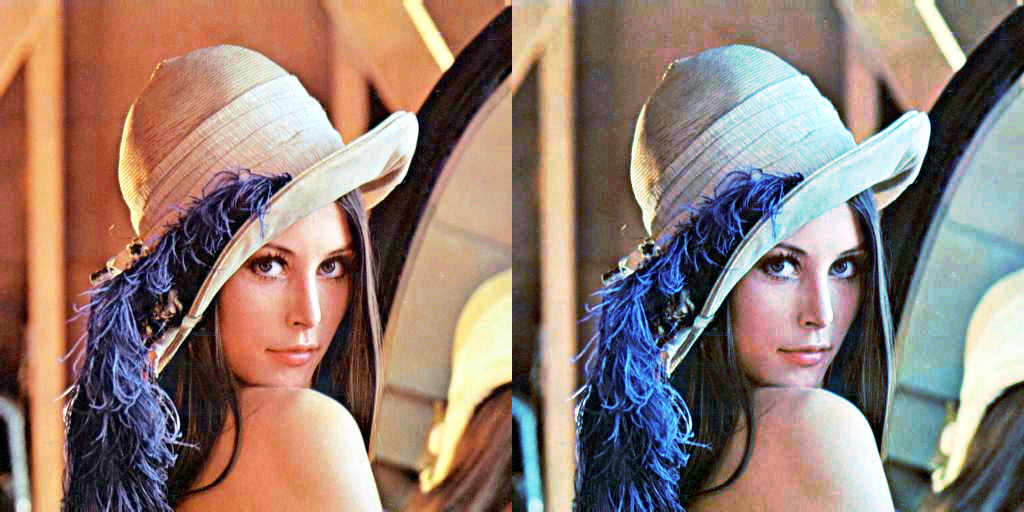

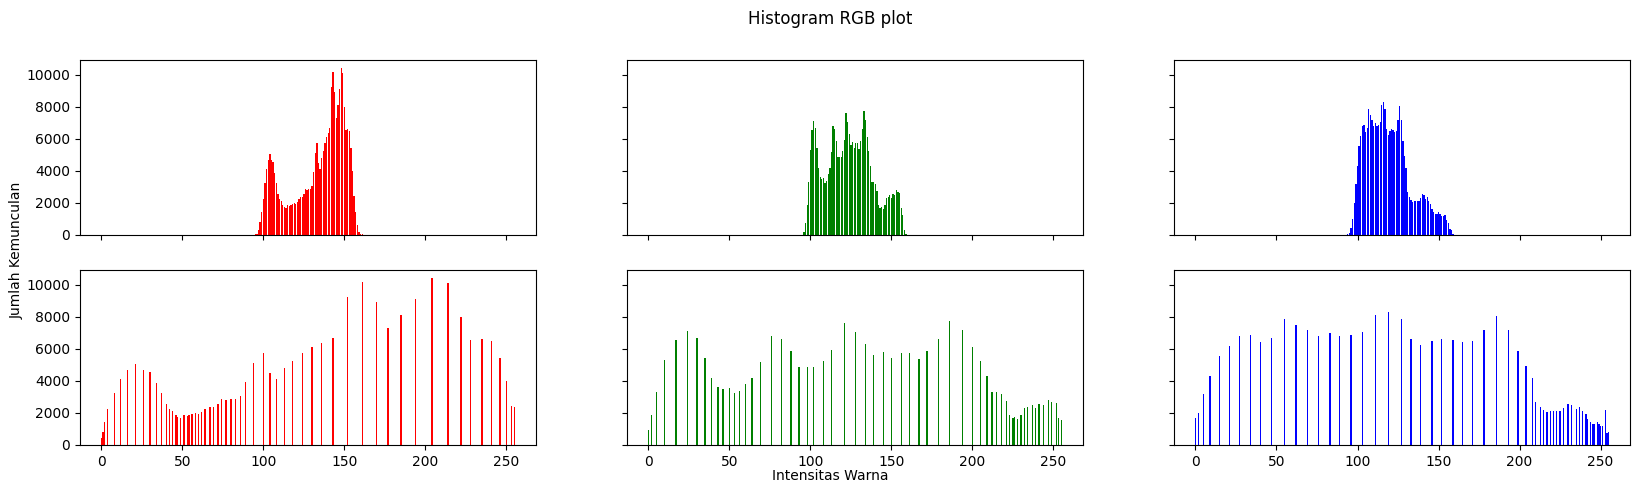

In [89]:
# Soal nomor 6

# Memisahkan saluran warna pada citra
channels = cv.split(img1)

# Melakukan histogram equalization pada masing-masing saluran warna
equalized_channels = []
for ch, color in zip(channels, ["Red", "Green", "Blue"]):
    equalized_channels.append(cv.equalizeHist(ch))

# Menggabungkan saluran warna yang sudah di-equalisasi
equalized_image = cv.merge(equalized_channels)

# Menampilkan citra asli dan hasil histogram equalization
final_frame = cv.hconcat((img1, equalized_image))
cv2_imshow(final_frame)

# Menghitung histogram citra setelah histogram equalization
equal_histo = histo(equalized_image)

# Mengecek apakah citra grayscale atau tidak
is_gray_image = np.array_equal(blue, green, red)

# Menampilkan histogram citra RGB jika bukan citra grayscale
if not is_gray_image:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='gray')
    axs[0, 1].bar(names, equal_histo[2], color='gray')


Garis besar perbedaannya jika menggunakan equalized channel warna biru lebih rapat, jadi citra yang dihasilkan menjadi lebih biru dari nomor sebelumnya

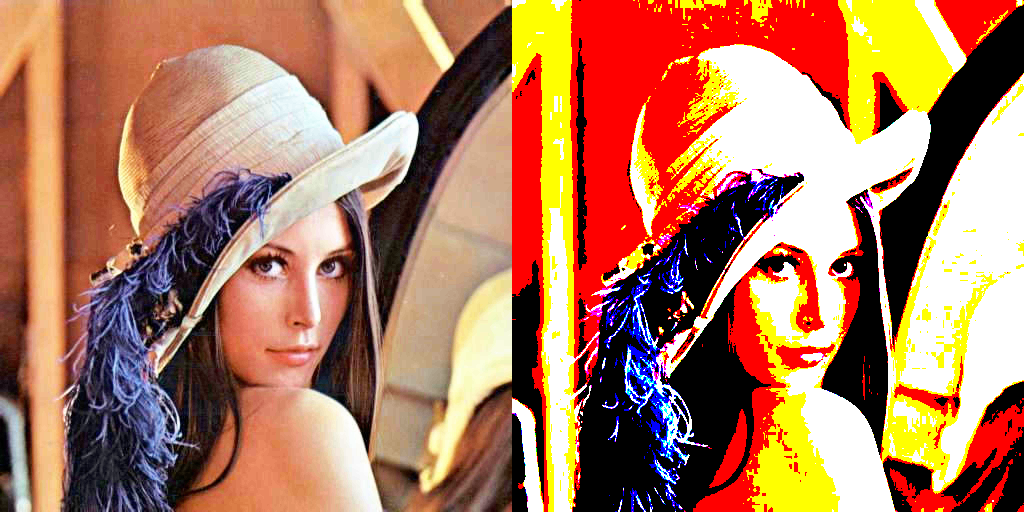

In [65]:
# Soal nomor 7

def find_nearest_color(r, g, b):
    pValue = 0
    minDistance = 255 * 255 + 255 * 255 + 255 * 255 + 1
    colorPalette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
    for i in range(len(colorPalette)):
        rDiff = r - colorPalette[i][0]
        gDiff = g - colorPalette[i][1]
        bDiff = b - colorPalette[i][2]
        distance = rDiff * rDiff + gDiff * gDiff + bDiff * bDiff
        if (distance < minDistance):
            minDistance = distance
            pValue = i
    return pValue

colorPalette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
    for x in range(0, img_16.shape[1]):
        nearest_color = find_nearest_color(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
        img_8[y, x] = colorPalette[nearest_color]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

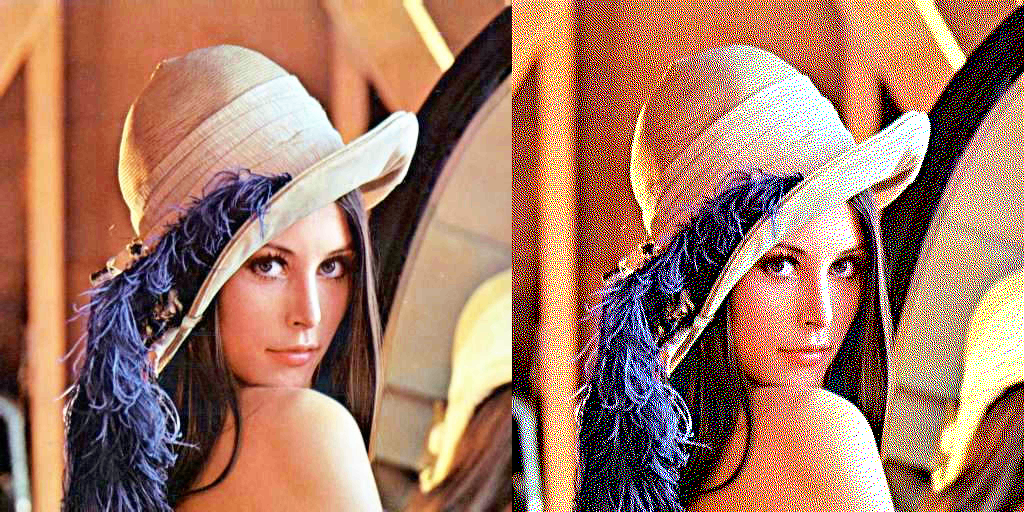

In [76]:
# Soal nomor 8

from PIL import Image
import matplotlib.pyplot as plt

img_float = np.float64(img1)

height, width, channels = img1.shape

for y in range(height):
    for x in range(width):
        for c in range(channels):
            old_value = img_float[y, x, c]
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

img2 = np.uint8(img_float)

final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

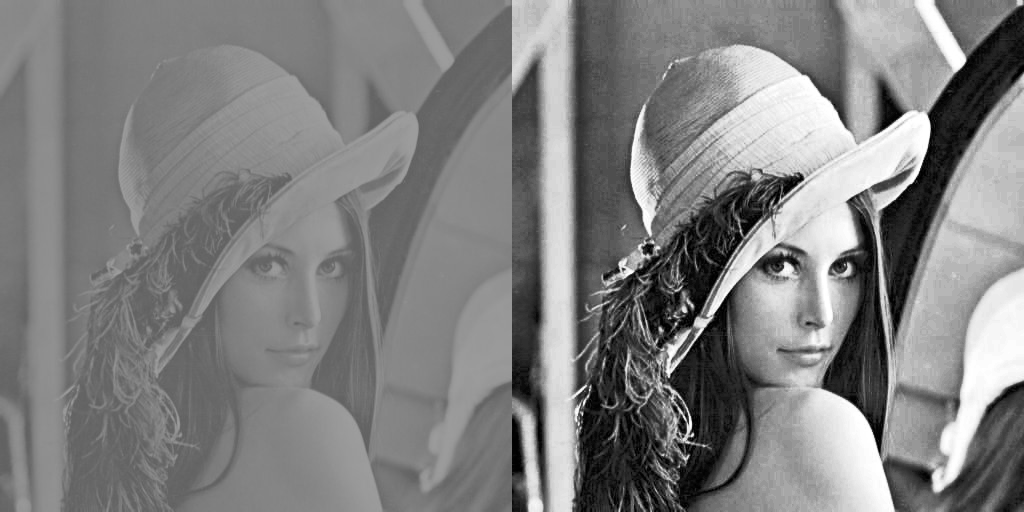

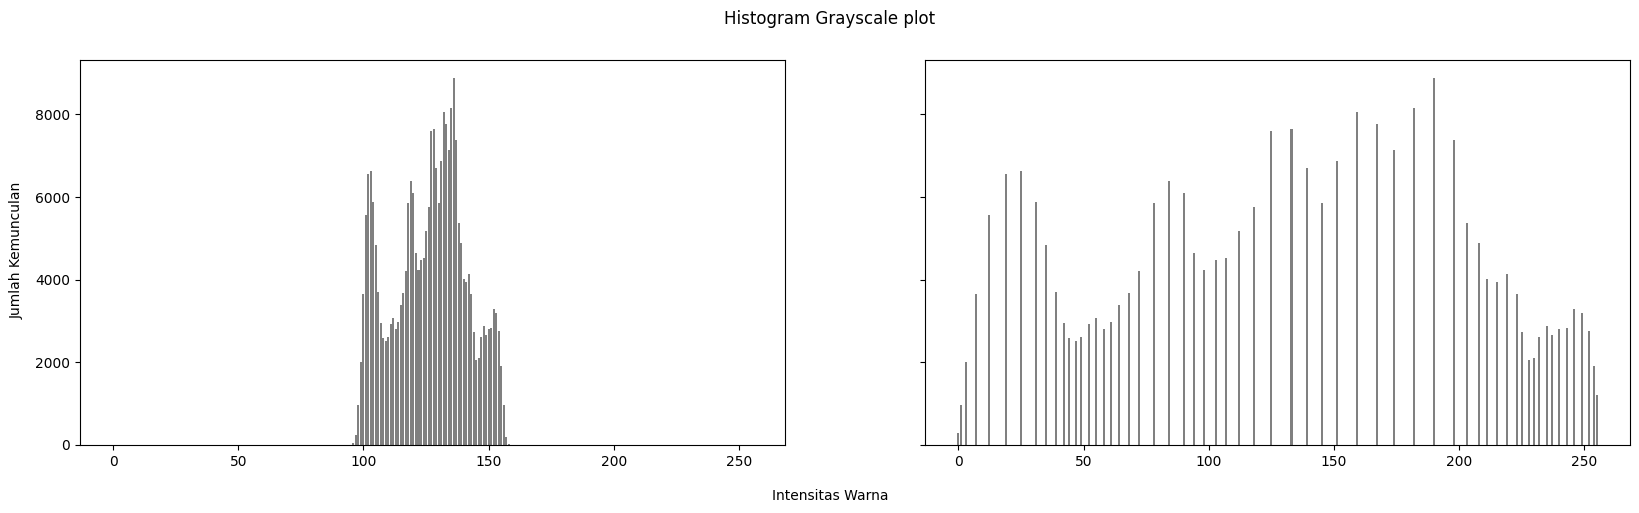

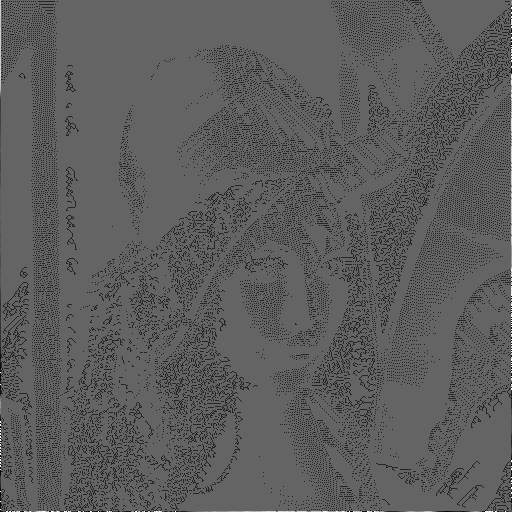

In [90]:
# Soal nomor 9

img = cv.imread("/content/drive/MyDrive/content/lena_lc.jpg", cv.IMREAD_GRAYSCALE)

equalized_img = cv.equalizeHist(img)

height, width = equalized_img.shape[0], equalized_img.shape[1]
dithered_img = np.copy(equalized_img)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_img[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_img[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_img[y, x + 1] += quantization_error * 1 / 16
        dithered_img[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_img[y + 1, x] += quantization_error * 3 / 16
        dithered_img[y + 1, x + 1] += quantization_error * 3 / 16

histo_asli = cv.calcHist([img], [0], None, [256], [0, 256])
histo_equalized = cv.calcHist([equalized_img], [0], None, [256], [0, 256])

fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

combined_img = cv.hconcat([img, equalized_img])

cv2_imshow(combined_img)
plt.show()
cv2_imshow(dithered_img)
